In [1]:
#Kerakli kutubxonalar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Datasetni yuklab olamiz

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
382,1,109,60,8,182,25.4,0.947,21,0
23,9,119,80,35,0,29.0,0.263,29,1
1,1,85,66,29,0,26.6,0.351,31,0
303,5,115,98,0,0,52.9,0.209,28,1
524,3,125,58,0,0,31.6,0.151,24,0


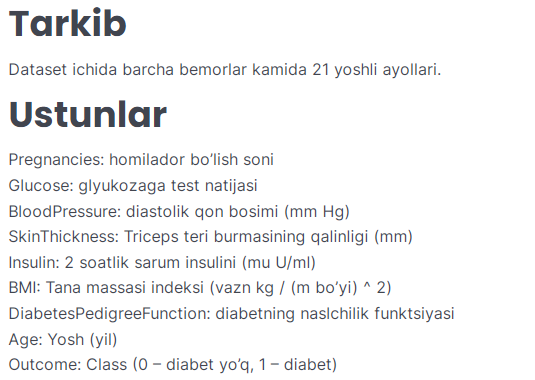

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Diabet yo'qlar soni ->  500 ta**

**Diabet borlar soni -> 268 ta** ekan orasida farq katta bo'lganligi natijaga ta'sir qiladi

In [7]:
while df.shape[0]> 2*268:
  a = df.sample(1)
  if a['Outcome'].item() == 0:
    df.drop(a.index, inplace=True)

df.shape

(536, 9)

In [8]:
#Ma'lumotlarni muvozanatlashtirib oldik
df['Outcome'].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

Kasallar va kasal bo'lmaganlar bitta joyga yig'ilib qolmaganligini tekshirib olamiz

In [9]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
563,6,99,60,19,54,26.9,0.497,32,0
105,1,126,56,29,152,28.7,0.801,21,0
155,7,152,88,44,0,50.0,0.337,36,1
722,1,149,68,29,127,29.3,0.349,42,1
175,8,179,72,42,130,32.7,0.719,36,1


In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [11]:
corr_mat = df.corr().abs()
corr_mat.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121236,0.128975,0.066093,0.087724,0.022293,0.044759,0.533356,0.196525
Glucose,0.121236,1.000000,0.140611,0.071439,0.324358,0.229078,0.146010,0.261745,0.470038
BloodPressure,0.128975,0.140611,1.000000,0.242183,0.098077,0.263057,0.044552,0.243680,0.092447
SkinThickness,0.066093,0.071439,0.242183,1.000000,0.438723,0.396109,0.241858,0.107433,0.101234
Insulin,0.087724,0.324358,0.098077,0.438723,1.000000,0.183107,0.207270,0.065146,0.124637
BMI,0.022293,0.229078,0.263057,0.396109,0.183107,1.000000,0.160555,0.005893,0.339597
DiabetesPedigreeFunction,0.044759,0.146010,0.044552,0.241858,0.207270,0.160555,1.000000,0.007989,0.206290
Age,0.533356,0.261745,0.243680,0.107433,0.065146,0.005893,0.007989,1.000000,0.220522
Outcome,0.196525,0.470038,0.092447,0.101234,0.124637,0.339597,0.206290,0.220522,1.000000


Bog'liqligi kam bo'lgan ustunlarni o'chiramiz

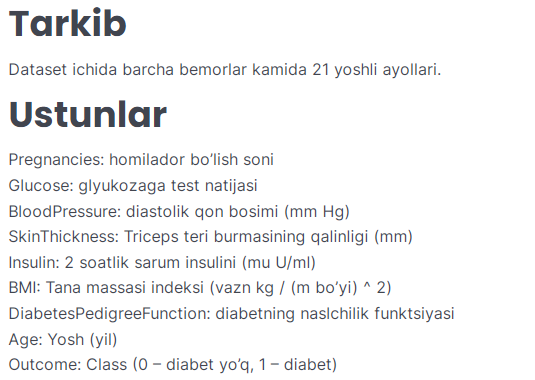

In [12]:
df.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)

corr_mat = df.corr().abs()
corr_mat.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121236,0.087724,0.022293,0.044759,0.533356,0.196525
Glucose,0.121236,1.000000,0.324358,0.229078,0.146010,0.261745,0.470038
Insulin,0.087724,0.324358,1.000000,0.183107,0.207270,0.065146,0.124637
BMI,0.022293,0.229078,0.183107,1.000000,0.160555,0.005893,0.339597
DiabetesPedigreeFunction,0.044759,0.146010,0.207270,0.160555,1.000000,0.007989,0.206290
Age,0.533356,0.261745,0.065146,0.005893,0.007989,1.000000,0.220522
Outcome,0.196525,0.470038,0.124637,0.339597,0.206290,0.220522,1.000000


In [13]:
df.corrwith(df['Outcome'])

Pregnancies                 0.196525
Glucose                     0.470038
Insulin                     0.124637
BMI                         0.339597
DiabetesPedigreeFunction    0.206290
Age                         0.220522
Outcome                     1.000000
dtype: float64

X va Y ga ajratib olamiz

In [14]:
x = df.drop('Outcome', axis=1)
x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
5,5,116,0,25.6,0.201,30


In [15]:
y = df['Outcome']
y.head()

0    1
2    1
3    0
4    1
5    0
Name: Outcome, dtype: int64

In [16]:
# Standartlashtirib olamiz
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

x = standard.fit_transform(x)
x

array([[ 0.51859291,  0.67026429, -0.68549106,  0.14520552,  0.42912749,
         1.29251487],
       [ 1.08644951,  1.70962271, -0.68549106, -1.15280394,  0.56020856,
        -0.19949081],
       [-0.90104857, -1.08179704,  0.07348098, -0.54790633, -0.9108124 ,
        -1.11127206],
       ...,
       [ 1.3703778 ,  1.3235753 , -0.68549106,  1.45581702, -0.22336498,
         0.71229044],
       [ 1.6543061 , -0.72544558,  0.76785965,  0.05699129, -0.89916075,
         2.37007452],
       [-0.90104857,  0.01695329, -0.68549106, -0.29586565, -0.38066227,
         1.04384726]])

In [17]:
#Train va Test set ga ajratamiz
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

**k-NN** ni chaqirib olamiz

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

**GRID** search yordamida eng yaxshi **k** ni topib olamiz

In [19]:
from sklearn.model_selection import GridSearchCV

grid_param = {'n_neighbors': np.arange(1, 25)}
knn_gridS = GridSearchCV(knn, grid_param, cv=5)
knn_gridS.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [20]:
knn_gridS.cv_results_

{'mean_fit_time': array([0.00165181, 0.0014473 , 0.00143805, 0.00141397, 0.00139084,
        0.00151548, 0.00158005, 0.00136547, 0.00154948, 0.00151587,
        0.00146694, 0.00126057, 0.00143275, 0.00168452, 0.00159588,
        0.00142579, 0.00126424, 0.00173316, 0.0019052 , 0.00149107,
        0.00139375, 0.00322895, 0.00141425, 0.00135226]),
 'mean_score_time': array([0.0052115 , 0.00448651, 0.00502725, 0.00530195, 0.00516934,
        0.00519896, 0.00510626, 0.00518684, 0.00528846, 0.00615907,
        0.00469241, 0.00460572, 0.00554867, 0.00776877, 0.0054318 ,
        0.00481539, 0.00468612, 0.01015272, 0.00821276, 0.00555754,
        0.00554237, 0.00638704, 0.00498147, 0.00520482]),
 'mean_test_score': array([0.64923849, 0.66415715, 0.72945656, 0.69582901, 0.72009346,
        0.71258221, 0.73316026, 0.74060228, 0.73871582, 0.7406369 ,
        0.73689858, 0.73509865, 0.75      , 0.74627899, 0.75001731,
        0.75560748, 0.75938041, 0.75003461, 0.75749394, 0.74627899,
        0.753

In [21]:
knn_gridS.cv_results_['rank_test_score']

array([24, 23, 19, 22, 20, 21, 18, 14, 15, 13, 16, 17,  9, 11,  8,  4,  1,
        7,  3, 12,  5, 10,  6,  2], dtype=int32)

In [22]:
n = knn_gridS.best_params_['n_neighbors']
knn_gridS.best_params_

{'n_neighbors': 17}

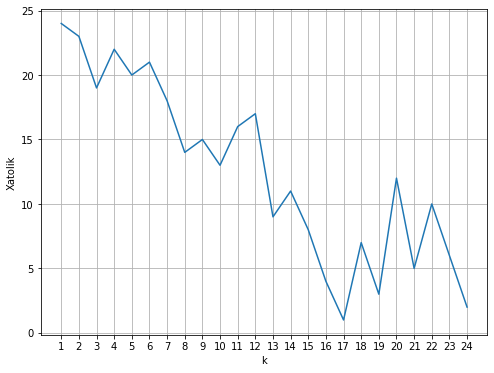

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(grid_param['n_neighbors'], knn_gridS.cv_results_['rank_test_score'])
plt.ylabel('Xatolik')
plt.xlabel('k')
plt.xticks(grid_param['n_neighbors'])
plt.grid()
plt.show()

In [24]:
knn_grid = KNeighborsClassifier(n_neighbors=n)

knn_grid.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [25]:
y_predict = knn_gridS.predict(x_test)

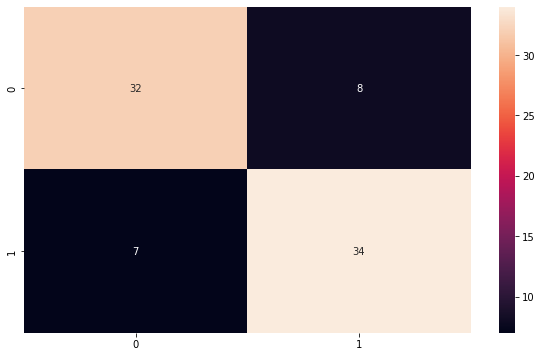

In [26]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))
print(accuracy_score(y_test, y_predict))

0.8095238095238095
0.8292682926829268
0.8192771084337348
0.8148148148148148
